In [63]:
import sys
import os

# sys.path.append('scripts')

import re
import json
import statistics
import argparse
import itertools
from pathlib import Path
import collections
from concurrent.futures import ProcessPoolExecutor

import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm
from matplotlib.patches import FancyBboxPatch
from matplotlib.patches import PathPatch
from matplotlib.path import get_path_collection_extents
import seaborn as sns

from rich import print, pretty
from typing import  Iterable
import pretty_errors
from catppuccin import PALETTE

print(os.getcwd())

# import .scripts.ldj
# from ldj import ldj
# from utils import *

pretty.install()

EXPERIMENT_DIR = Path("../experiments2")
assert EXPERIMENT_DIR.is_dir() and EXPERIMENT_DIR.exists()

# RESULTS_DIRS = [
#     Path('./experiments/circle-experiment-lm-3-th-5'),
#     Path('./experiments/circle-experiment-lm-1-th-13'),
#     Path('./experiments/circle-experiment-lm-3-th-13'),
#     Path('./experiments/environment-obstacles-lm-3-th-5-good'),
# ]

# for RESULTS_DIR in RESULTS_DIRS:
#     assert RESULTS_DIR.is_dir() and RESULTS_DIR.exists()

# RESULTS_DIR = Path('./experiments/circle-experiment-lm-3-th-5')

# assert RESULTS_DIR.is_dir() and RESULTS_DIR.exists()

flavor = PALETTE.latte.colors
# num-robots-10-seed-0.json
# RE = re.compile(r"num-robots-(\d+)-seed-(\d+).json")


/home/kpbaks/university/semesters/10/master-thesis/gbp-rs/scripts

In [119]:
# use LaTeX for text with matplotlib
sns.set_style("darkgrid")
# set background color of sns darkgrid to flavor.base.hex
plt.rcParams['axes.facecolor'] = flavor.base.hex
# set font color to flavor.text.hex
plt.rcParams['text.color'] = flavor.text.hex

font_dirs = ["fonts/"]
# go through all fonts in the font directory and add them
for font_dir in font_dirs:
    for font in os.listdir(font_dir):
        fm.fontManager.addfont(f"{font_dir}/{font}")

prop_jbm = fm.FontProperties(fname='fonts/JetBrainsMonoNerdFontMono-Regular.ttf')
prop = fm.FontProperties(fname='fonts/STIXTwoText-VariableFont_wght.ttf')

plt.rcParams.update({
    # "text.usetex": True,
    "font.family": prop.get_name(),
    # "font.family": "stix",
    # "font.sans-serif": prop.get_name(),
    "mathtext.fontset": "stix",
    # "text.latex.preamble": r"\usepackage{fontenc}\usepackage{fontspec}\setmainfont{JetBrainsMonoNerdFontMono-Regular}",
})

print(prop.get_name())

colors = [
    (flavor.lavender.hex, 1.0, (1, 0), 'o'),
    (flavor.teal.hex,   0.3, (2, 2), 'X'),
    (flavor.green.hex,    0.3, (2, 2), 'X'),
    (flavor.mauve.hex, 0.5, (2, 2), 'o')
]

STIX Two Text

In [144]:
aggregation_fn = statistics.mean
# aggregation_fn = statistics.median

# Environment Obstacles




In [145]:
dir = EXPERIMENT_DIR / 'environment-obstacles'
assert dir.is_dir() and dir.exists()

RE = re.compile(r'num-robots-(?P<robots>\d+)-seed-(?P<seed>\d+).json')

result: dict[int, list[int]] = {}

for file in dir.glob('*.json'):
    match = RE.match(file.name)
    assert match is not None
    num_robots = int(match.group(1))
    seed = int(match.group(2))

    with open(file, 'r') as file:
        data = json.load(file)
        environment_collisions: int = len(data['collisions']['environment'])
        if num_robots in result:
            result[num_robots].append(environment_collisions)
        else:
            result[num_robots] = [environment_collisions]


In [146]:
aggregated_result_environment_obstacles: dict[int, float] = {
    k: aggregation_fn(c) for k,c in result.items()
}

aggregated_result_environment_obstacles

{30: 4.6, 35: 4.2, 40: 7.8, 5: 0.2, 25: 2.4, 20: 2.2, 10: 1.4, 15: 1, 50: 16.4, 45: 9.4}

# Varying Network Connectivity



In [147]:
dir = EXPERIMENT_DIR / 'varying-network-connectivity'
assert dir.is_dir() and dir.exists()

RE = re.compile(r'comms-radius-(?P<comms_radius>\d+)-seed-(?P<seed>\d+).json')

result: dict[int, list[int]] = {}

for file in dir.glob('*.json'):
    match = RE.match(file.name)
    assert match is not None
    comms_radius = int(match.group(1))
    seed = int(match.group(2))

    with open(file, 'r') as file:
        data = json.load(file)
        environment_collisions: int = len(data['collisions']['environment'])
        if comms_radius in result:
            result[comms_radius].append(environment_collisions)
        else:
            result[comms_radius] = [environment_collisions]


In [148]:
aggregated_result_varying_network_connectivity: dict[int, float] = {
    k: aggregation_fn(c) for k,c in result.items()
}

aggregated_result_varying_network_connectivity

{20: 4.6, 60: 5.6, 80: 5.2, 40: 4.8}

# Communication Failure

In [149]:
dir = EXPERIMENT_DIR / 'communications-failure-lm-3-tk-5'
assert dir.is_dir() and dir.exists()

RE = re.compile(r'v0-(?P<v0>\d+)-failure-(?P<failure>\d\.\d)-.*seed-(?P<seed>\d+).json')

result: dict[int, list[int]] = {}

result: dict[int, dict[float, [list[int]]]] = dict()

for file in dir.glob('*.json'):
    match = RE.match(file.name)
    assert match is not None
    v0 = int(match.group(1))
    failure = float(match.group(2))
    seed = int(match.group(3))

    with open(file, 'r') as file:
        data = json.load(file)
        environment_collisions: int = len(data['collisions']['environment'])
        if v0 not in result:
            result[v0] = dict()
        
        if failure not in result[v0]:
            result[v0][failure] = []

        result[v0][failure].append(environment_collisions)

In [150]:
aggregated_result_communications_failure: dict[int, dict[float, int]] = {
    k1: {k2: aggregation_fn(v2) for k2, v2 in v1.items()} for k1, v1 in result.items()
}

aggregated_result_communications_failure


{
    10: {0.7: 4.4, 0.5: 3.8, 0.2: 2.4, 0.0: 1.8, 0.6: 3.8, 0.3: 2.4, 0.4: 3.4, 0.1: 3.4},
    15: {0.0: 3.2, 0.5: 2.8, 0.1: 3.6, 0.4: 3.6, 0.6: 3.2, 0.2: 2.2, 0.7: 4.4, 0.3: 2.4}
}

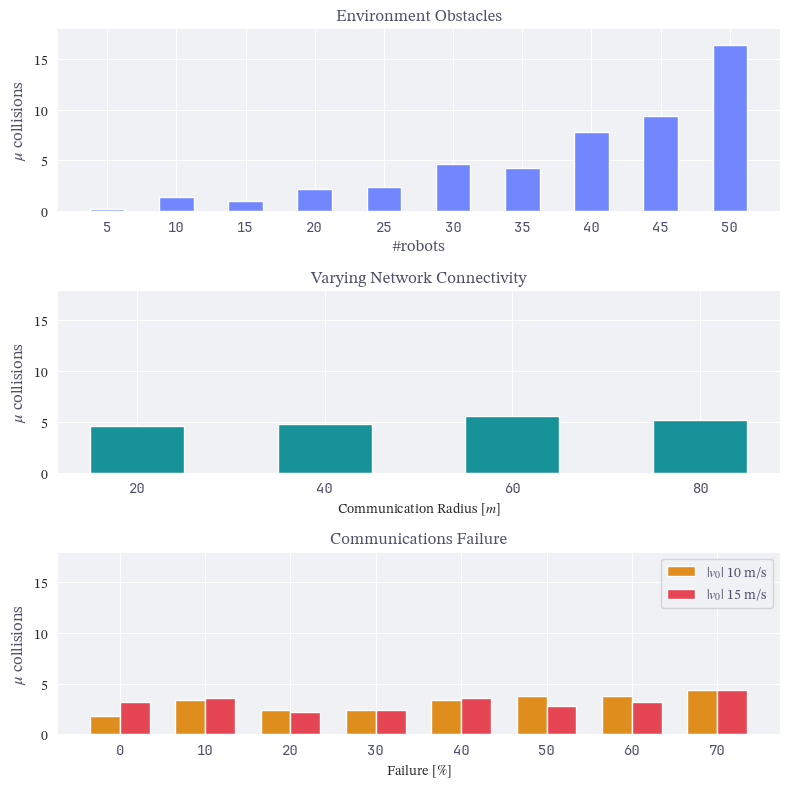

In [152]:
fig, axs = plt.subplots(3, figsize=(8,8))
# fig.patch.set_facecolor((0, 0, 0, 0))
ylabel: str = '$\mu$ collisions'
label_args = dict(fontsize=12, fontdict={'color': flavor.text.hex})
ticklabels_args = dict(fontproperties=prop_jbm, fontdict=dict(color=flavor.text.hex))
title_args = label_args
ymax = 18

for ax in axs:
    ax.set_ylim(0, ymax)
    ax.set_ylabel(ylabel,  **label_args)

# ax.set_yticklabels(yticks, fontproperties=prop_jbm, fontdict=dict(color=flavor.text.hex))


ax = axs[0]

for k, v in sorted(aggregated_result_environment_obstacles.items(), key=lambda it: it[0]):
    ax.bar(k / 5, v, 0.5, color=flavor.lavender.hex)


xticks = [k / 5 for k in sorted(aggregated_result_environment_obstacles.keys())]
ax.set_xticks(xticks)
xticklabels = list(sorted(aggregated_result_environment_obstacles.keys()))
ax.set_xticklabels(xticklabels, **ticklabels_args)

# ax.bar(
#     aggregated_result_environment_obstacles.keys(), 
#     aggregated_result_environment_obstacles.values(),
#     0.5,
#     color=flavor.lavender.hex
# )
ax.set_xlabel('#robots', **label_args)
ax.set_title("Environment Obstacles", **title_args)

ax = axs[1]

for k, v in sorted(aggregated_result_varying_network_connectivity.items(), key=lambda it: it[0]):
    ax.bar(k / 20.0, v, 0.5, color=flavor.teal.hex)
ax.set_xlabel('Communication Radius $[m]$')
ax.set_title("Varying Network Connectivity", **title_args)
xticks = [k / 20.0 for k in sorted(aggregated_result_varying_network_connectivity.keys())]
ax.set_xticks(xticks)
xticklabels = list(sorted(aggregated_result_varying_network_connectivity.keys()))
ax.set_xticklabels(xticklabels, **ticklabels_args)



# Communications Failure
ax = axs[2]


# data = {
#     10: {0.7: 4.4, 0.5: 3.8, 0.2: 2.4, 0.0: 1.8, 0.6: 3.8, 0.3: 2.4, 0.4: 3.4, 0.1: 3.4},
#     15: {0.0: 3.2, 0.5: 2.8, 0.1: 3.6, 0.4: 3.6, 0.6: 3.2, 0.2: 2.2, 0.7: 4.4, 0.3: 2.4}
# }

data = aggregated_result_communications_failure

# Prepare data for plotting
probabilities = sorted({k for v in data.values() for k in v})
categories = sorted(data.keys())
bar_width = 0.35
index = np.arange(len(probabilities))

# fig, ax = plt.subplots()

ax = axs[2]

colors = [flavor.yellow.hex, flavor.maroon.hex]

for i, (category, color) in enumerate(zip(categories, colors)):
    values = [data[category].get(p, 0) for p in probabilities]
    ax.bar(index + i * bar_width, values, bar_width, color=color, label=f'$|v_0|$ {category} m/s')

# Add labels, title, and legend
ax.set_xlabel('Failure $[\%]$')
ax.set_title('Communications Failure')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(probabilities)
xticklabels = [f"{p * 100:.0f}" for p in probabilities]
ax.set_xticklabels(xticklabels, **ticklabels_args)

ax.legend()

plt.tight_layout()

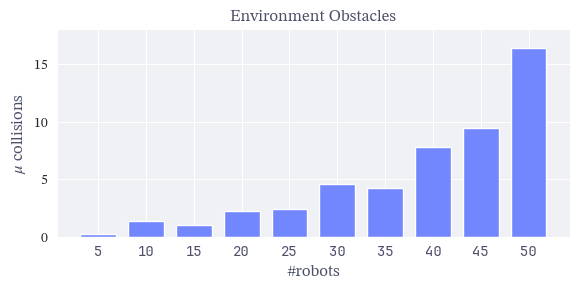

In [176]:
fig, ax = plt.subplots(1, figsize=(6,3))
# fig.patch.set_facecolor((0, 0, 0, 0))
ylabel: str = '$\mu$ collisions'
label_args = dict(fontsize=12, fontdict={'color': flavor.text.hex})
ticklabels_args = dict(fontproperties=prop_jbm, fontdict=dict(color=flavor.text.hex))
title_args = label_args
ymax = 18
bar_width: float = 0.75
ax.set_ylim(0, ymax)
ax.set_ylabel(ylabel,  **label_args)

for k, v in sorted(aggregated_result_environment_obstacles.items(), key=lambda it: it[0]):
    ax.bar(k / 5, v, bar_width, color=flavor.lavender.hex)

xticks = [k / 5 for k in sorted(aggregated_result_environment_obstacles.keys())]
ax.set_xticks(xticks)
xticklabels = list(sorted(aggregated_result_environment_obstacles.keys()))
ax.set_xticklabels(xticklabels, **ticklabels_args)

ax.set_xlabel('#robots', **label_args)
ax.set_title("Environment Obstacles", **title_args)

plt.tight_layout()
fig.patch.set_facecolor((0, 0, 0, 0))

plt.savefig('environment-collisions-environment-obstacles.svg')

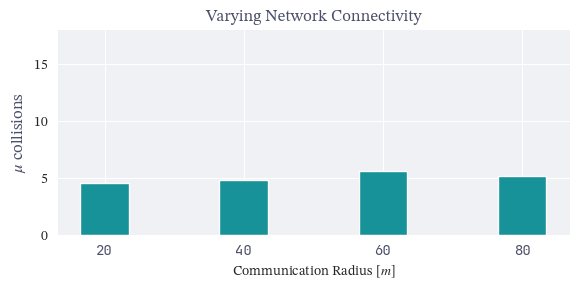

In [175]:
fig, ax = plt.subplots(1, figsize=(6,3))
ax.set_ylim(0, ymax)
ax.set_ylabel(ylabel,  **label_args)

for k, v in sorted(aggregated_result_varying_network_connectivity.items(), key=lambda it: it[0]):
    ax.bar(k / 20.0, v, bar_width, color=flavor.teal.hex)
ax.set_xlabel('Communication Radius $[m]$')
ax.set_title("Varying Network Connectivity", **title_args)
xticks = [k / 20.0 for k in sorted(aggregated_result_varying_network_connectivity.keys())]
ax.set_xticks(xticks)
xticklabels = list(sorted(aggregated_result_varying_network_connectivity.keys()))
ax.set_xticklabels(xticklabels, **ticklabels_args)

plt.tight_layout()
fig.patch.set_facecolor((0, 0, 0, 0))

plt.savefig('environment-collisions-varying-network-connectivity.svg')

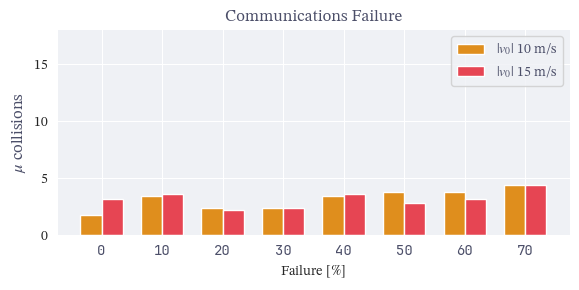

In [177]:
data = aggregated_result_communications_failure

# Prepare data for plotting
probabilities = sorted({k for v in data.values() for k in v})
categories = sorted(data.keys())
bar_width = 0.35
index = np.arange(len(probabilities))

fig, ax = plt.subplots(1, figsize=(6,3))
ax.set_ylim(0, ymax)
ax.set_ylabel(ylabel,  **label_args)


colors = [flavor.yellow.hex, flavor.maroon.hex]

for i, (category, color) in enumerate(zip(categories, colors)):
    values = [data[category].get(p, 0) for p in probabilities]
    ax.bar(index + i * bar_width, values, bar_width, color=color, label=f'$|v_0|$ {category} m/s')

# Add labels, title, and legend
ax.set_xlabel('Failure $[\%]$')
ax.set_title('Communications Failure')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(probabilities)
xticklabels = [f"{p * 100:.0f}" for p in probabilities]
ax.set_xticklabels(xticklabels, **ticklabels_args)

ax.legend()

plt.tight_layout()
fig.patch.set_facecolor((0, 0, 0, 0))

plt.savefig('environment-collisions-communications-failure.svg')